<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/PyDataAnalyze_PCA_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTvk3Ce4JZRlw4bHNFNgktP6KY2nYMQ4AAvyBUzT0W9VlvqGydsH76zNn4A0WOHUnxV0_lRbyAFTHRs/pub?gid=61772901&single=true&output=csv')
df.head()

,観測地点,ave,max.ave,min.ave,25over
0,盛岡,21.6,26.0,18.1,4
1,盛岡,24.3,29.8,19.6,13
2,盛岡,22.9,28.1,18.1,8
3,盛岡,19.8,24.3,16.0,0
4,盛岡,21.9,26.6,18.1,3


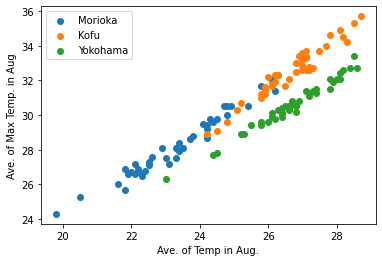

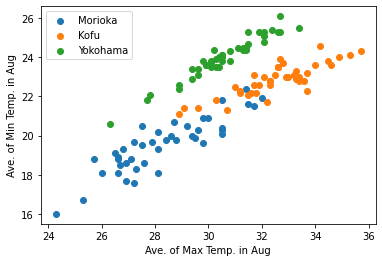

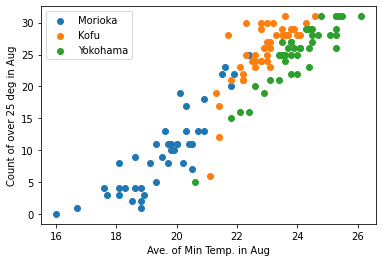

In [3]:
# 生データを散布図でプロットしてみる
# 説明変数が4つで2次元に表示するためには，6通りのxとyの組み合わせがあるが，とりあえず3つだけ
import matplotlib.pyplot as plt

# 都市名ラベルの0番目を除いた説明変数4つ分で3つのグラフを描く
for i in range(1, 4, 1):
  for j, a_city in enumerate(['Morioka', 'Kofu', 'Yokohama']):
    # 42年分 * 3都市分なので，都市ごとに色を変えるため，データを分けてscatterを呼び出す
    x = df.iloc[j*42:(j+1)*42, i].astype(np.float32)
    y = df.iloc[j*42:(j+1)*42, i+1].astype(np.float32)
    plt.scatter(x, y, label=a_city)
  if i==1:
    plt.xlabel('Ave. of Temp in Aug.')
    plt.ylabel('Ave. of Max Temp. in Aug')
  elif i==2:
    plt.xlabel('Ave. of Max Temp. in Aug')
    plt.ylabel('Ave. of Min Temp. in Aug')
  else:
    plt.xlabel('Ave. of Min Temp. in Aug')
    plt.ylabel('Count of over 25 deg in Aug')
  plt.legend()
  plt.show()

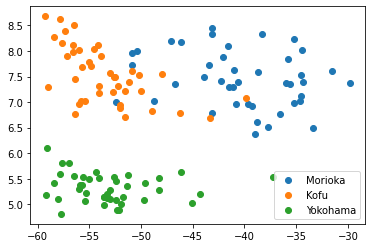

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 単位が違う説明変数（3つの説明変数の単位は摂氏温度で，1つの単位は日数である）を「標準化」or「正規化」する
scaler = StandardScaler()
df_sc = scaler.fit_transform(df.loc[:, ['ave', 'max.ave', 'min.ave', '25over']])

# 合成変数を2次元で作ると指定
pca_model = PCA(n_components=2)
# データを学習して合成変数への変換行列を作る
pca_model.fit(df_sc)

# 変換行列ができたので，
# 4次元(8月の平均気温，8月の日最高気温の平均，8月の日最低気温の平均，25度を超えた日数）の説明変数を，
# 2次元の合成変数に変換する（合成する）
transformed_variables = pca_model.transform(df.loc[:,  ['ave', 'max.ave', 'min.ave', '25over']])
# 使いやすいようにデータフレーム化しておく
transformed_df = pd.DataFrame(transformed_variables)

# 合成変数2つの散布図を描く
for i, a_city in enumerate( ['Morioka', 'Kofu', 'Yokohama']):
  plt.scatter(transformed_df.iloc[i*42:(i+1)*42, 0], transformed_df.iloc[i*42:(i+1)*42, 1], label=a_city)
plt.legend()
plt.show()

In [7]:
print(pca_model.explained_variance_ratio_)

[0.9307211 0.0561414]
